In [1]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score,auc
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings('ignore')

In [2]:
census=pd.read_csv("census.csv")

In [3]:
census.head(15)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,gain,loss,hours,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
5,37,Private,284582,Masters,14,Married-civ-spouse,Exec-managerial,Wife,White,Female,0,0,40,United-States,<=50K
6,49,Private,160187,9th,5,Married-spouse-absent,Other-service,Not-in-family,Black,Female,0,0,16,Jamaica,<=50K
7,52,Self-emp-not-inc,209642,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,45,United-States,>50K
8,31,Private,45781,Masters,14,Never-married,Prof-specialty,Not-in-family,White,Female,14084,0,50,United-States,>50K
9,42,Private,159449,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,5178,0,40,United-States,>50K


In [4]:
census.tail(20)

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,gain,loss,hours,native-country,income
32541,41,?,202822,HS-grad,9,Separated,?,Not-in-family,Black,Female,0,0,32,United-States,<=50K
32542,72,?,129912,HS-grad,9,Married-civ-spouse,?,Husband,White,Male,0,0,25,United-States,<=50K
32543,45,Local-gov,119199,Assoc-acdm,12,Divorced,Prof-specialty,Unmarried,White,Female,0,0,48,United-States,<=50K
32544,31,Private,199655,Masters,14,Divorced,Other-service,Not-in-family,Other,Female,0,0,30,United-States,<=50K
32545,39,Local-gov,111499,Assoc-acdm,12,Married-civ-spouse,Adm-clerical,Wife,White,Female,0,0,20,United-States,>50K
32546,37,Private,198216,Assoc-acdm,12,Divorced,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K
32547,43,Private,260761,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,Mexico,<=50K
32548,65,Self-emp-not-inc,99359,Prof-school,15,Never-married,Prof-specialty,Not-in-family,White,Male,1086,0,60,United-States,<=50K
32549,43,State-gov,255835,Some-college,10,Divorced,Adm-clerical,Other-relative,White,Female,0,0,40,United-States,<=50K
32550,43,Self-emp-not-inc,27242,Some-college,10,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,50,United-States,<=50K


In [5]:
cat_col = census.dtypes[census.dtypes == 'object']
num_col = census.dtypes[census.dtypes != 'object']

In [6]:
census.shape

(32561, 15)

In [7]:
census.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
age                32561 non-null int64
workclass          32561 non-null object
fnlwgt             32561 non-null int64
education          32561 non-null object
educational-num    32561 non-null int64
marital-status     32561 non-null object
occupation         32561 non-null object
relationship       32561 non-null object
race               32561 non-null object
gender             32561 non-null object
gain               32561 non-null int64
loss               32561 non-null int64
hours              32561 non-null int64
native-country     32561 non-null object
income             32561 non-null object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [8]:
census.describe()

,age,fnlwgt,educational-num,gain,loss,hours
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
census.isnull().sum()

age                0
workclass          0
fnlwgt             0
education          0
educational-num    0
marital-status     0
occupation         0
relationship       0
race               0
gender             0
gain               0
loss               0
hours              0
native-country     0
income             0
dtype: int64

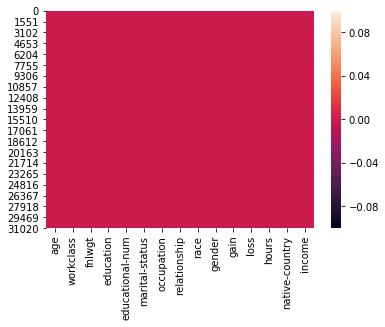

In [10]:
sns.heatmap(census.isnull())

In [11]:
cols = ['native-country','occupation','workclass']
for col in cols:
    census.loc[census[col] == '?', col] = 'unknown'

for col in cols:
    print(f"? in {col}: {census[(census[col] == '?')].any().sum()}")

? in native-country: 0
? in occupation: 0
? in workclass: 0


In [12]:
census["education"].unique()

array(['Bachelors', 'HS-grad', '11th', 'Masters', '9th', 'Some-college',
       'Assoc-acdm', 'Assoc-voc', '7th-8th', 'Doctorate', 'Prof-school',
       '5th-6th', '10th', '1st-4th', 'Preschool', '12th'], dtype=object)

In [13]:
higher_grade = ['HS-grad','11th','10th','9th','12th']
lower_grade = ['1st-4th','5th-6th','7th-8th','Preschool']
census['education'].replace(to_replace = higher_grade,value = 'H_grade',inplace = True)
census['education'].replace(to_replace = lower_grade,value = 'elementary_school',inplace = True)

census['education'].value_counts()

H_grade              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1198
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Name: education, dtype: int64

In [14]:
census["workclass"].unique()

array(['State-gov', 'Self-emp-not-inc', 'Private', 'Federal-gov',
       'Local-gov', 'unknown', 'Self-emp-inc', 'Without-pay',
       'Never-worked'], dtype=object)

In [15]:
self_emp = ['Self-emp-not-inc','Self-emp-inc']
govt_emp = ['Local-gov','State-gov','Federal-gov']

census['workclass'].replace(to_replace = self_emp ,value = 'Self_employed',inplace = True)
census['workclass'].replace(to_replace = govt_emp,value = 'Govt_employees',inplace = True)
census['workclass'].value_counts()


Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

In [16]:
census["marital-status"].unique()

array(['Never-married', 'Married-civ-spouse', 'Divorced',
       'Married-spouse-absent', 'Separated', 'Married-AF-spouse',
       'Widowed'], dtype=object)

In [17]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']
census['marital-status'].replace(to_replace = married ,value = 'Married',inplace = True)
census['marital-status'].replace(to_replace = separated,value = 'Separated',inplace = True)
census['marital-status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital-status, dtype: int64

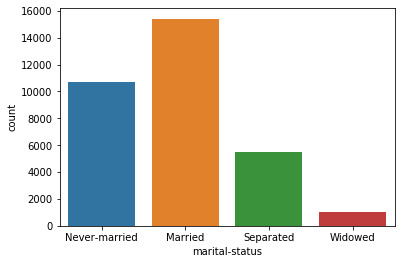

In [18]:
sns.countplot(census['marital-status'])

Text(0, 0.5, 'Frequency')

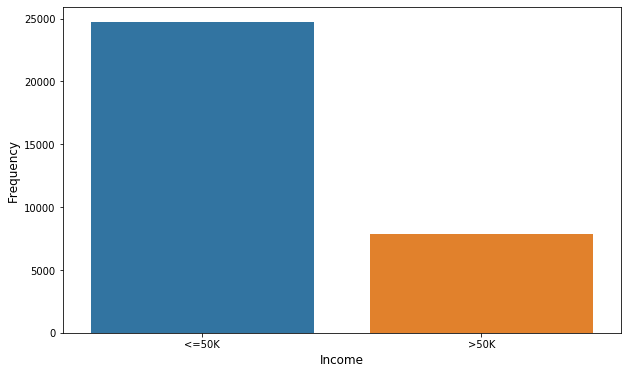

In [19]:
plt.figure(figsize =(10,6))
sns.countplot(x ='income', data = census)
plt.xlabel("Income",fontsize = 12)
plt.ylabel("Frequency",fontsize = 12)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000028085B44708>,
      dtype=object)

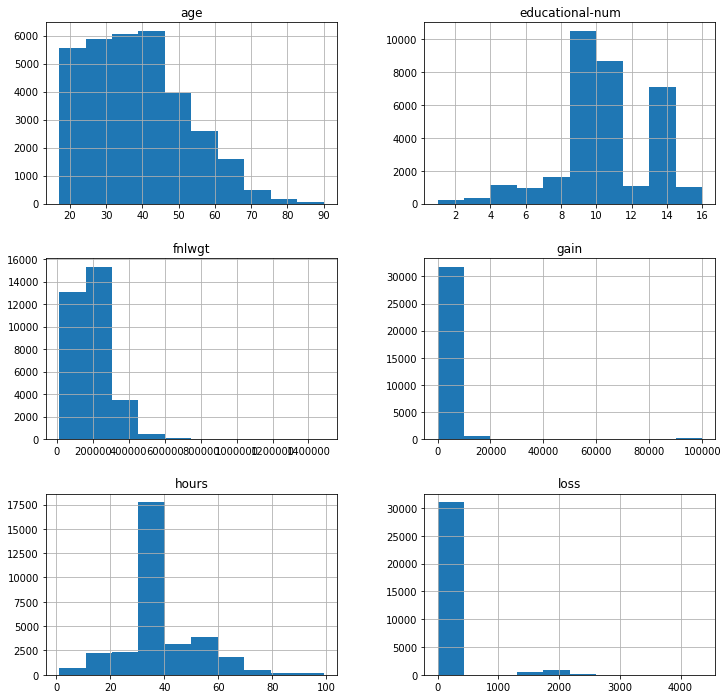

In [20]:
census[list(num_col.index)].hist(figsize = (12,12))

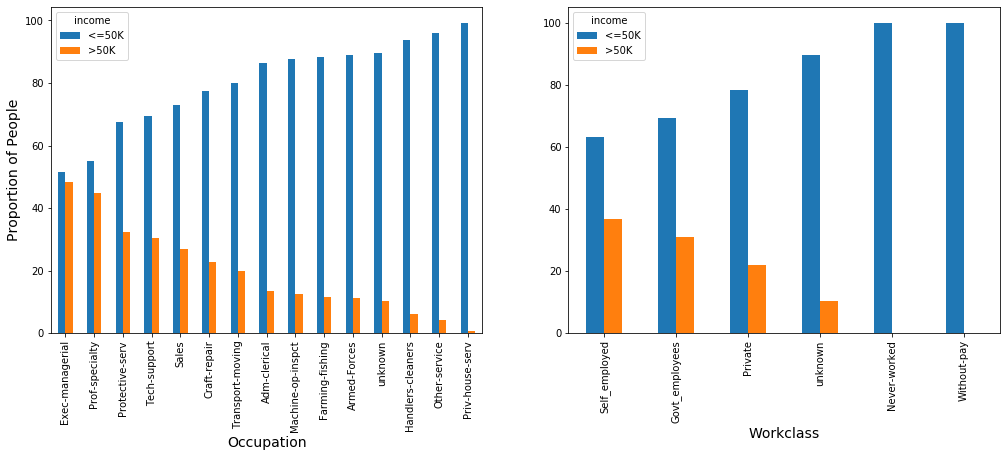

In [21]:
occu = pd.crosstab(census['occupation'],census['income'])
workclass = pd.crosstab(census['workclass'], census['income'])
edu = pd.crosstab(census['education'], census['income'])
marital = pd.crosstab(census['marital-status'], census['income'])
race = pd.crosstab(census['race'], census['income'])
gender= pd.crosstab(census['gender'], census['income'])
country = pd.crosstab(census['native-country'], census['income'])

fig = plt.figure(figsize = (17,6))

ax = fig.add_subplot(1,2,1)
(occu.div(occu.sum(axis= 1),axis = 0)*100).sort_values(by= '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Occupation",fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);


ax = fig.add_subplot(1,2,2)
(workclass.div(workclass.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax=ax);
plt.xlabel("Workclass",fontsize = 14);


Text(0, 0.5, 'Proportion of People')

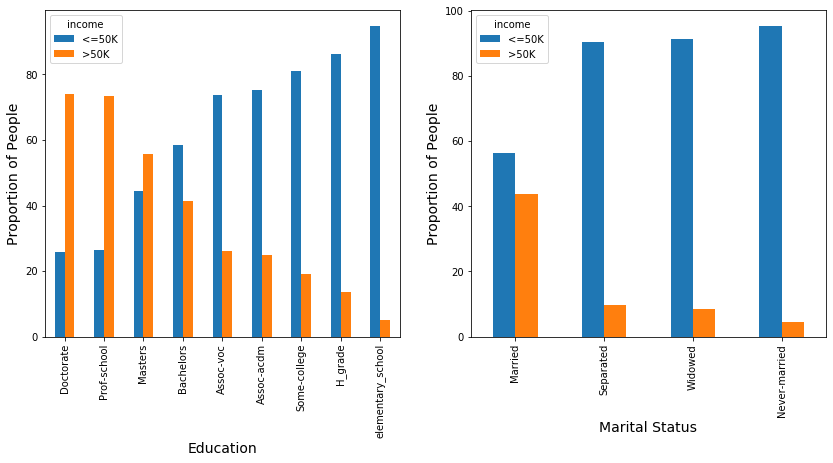

In [22]:
fig = plt.figure(figsize = (14,6))
ax = fig.add_subplot(1,2,1)
(edu.div(edu.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Education',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)


ax = fig.add_subplot(1,2,2)
(marital.div(marital.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax = ax)
plt.xlabel('Marital Status',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

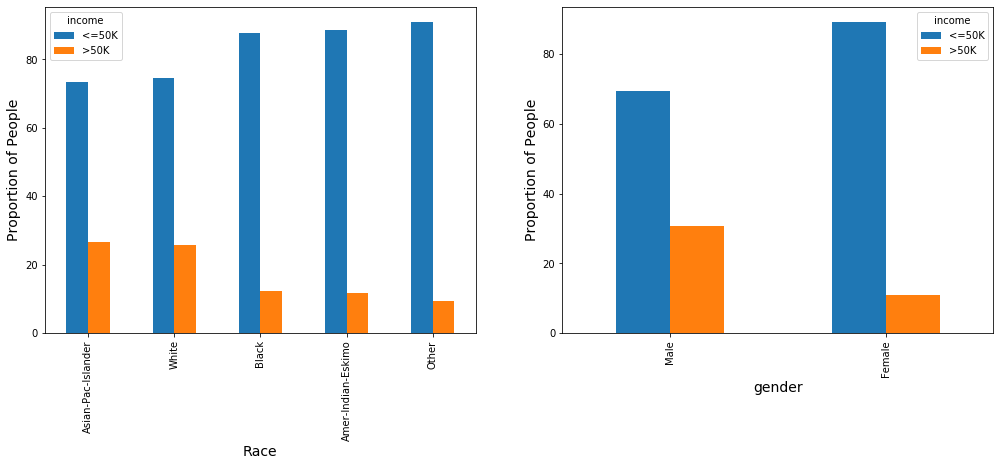

In [23]:
fig = plt.figure(figsize = (17,6))
ax = fig.add_subplot(1,2,1)
(race.div(race.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('Race',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

ax = fig.add_subplot(1,2,2)
(gender.div(gender.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',ax =ax);
plt.xlabel('gender',fontsize = 14);
plt.ylabel('Proportion of People',fontsize = 14);

Text(0, 0.5, 'Proportion of People')

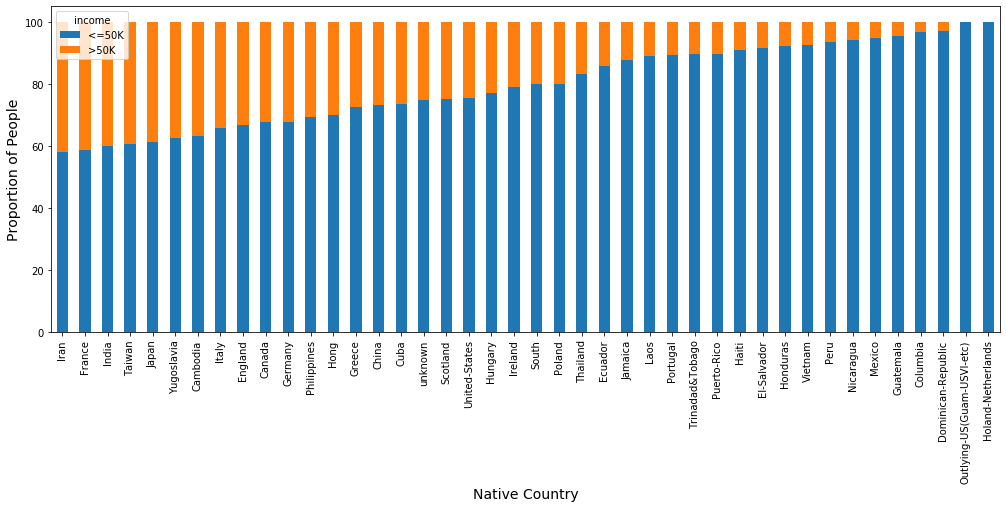

In [24]:
country = pd.crosstab(census['native-country'], census['income'])
(country.div(country.sum(axis = 1),axis = 0)*100).sort_values(by = '<=50K').plot(kind = 'bar',
                stacked = True,figsize = (17,6))
plt.xlabel('Native Country',fontsize = 14)
plt.ylabel('Proportion of People',fontsize = 14)

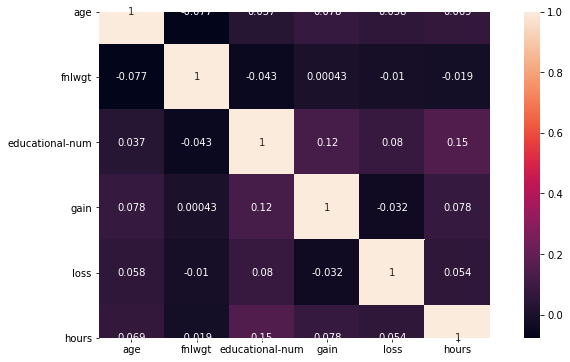

In [25]:
fig = plt.figure(figsize = (12,6))

sns.heatmap(census[list(num_col.index)].corr(),annot = True,square = True);

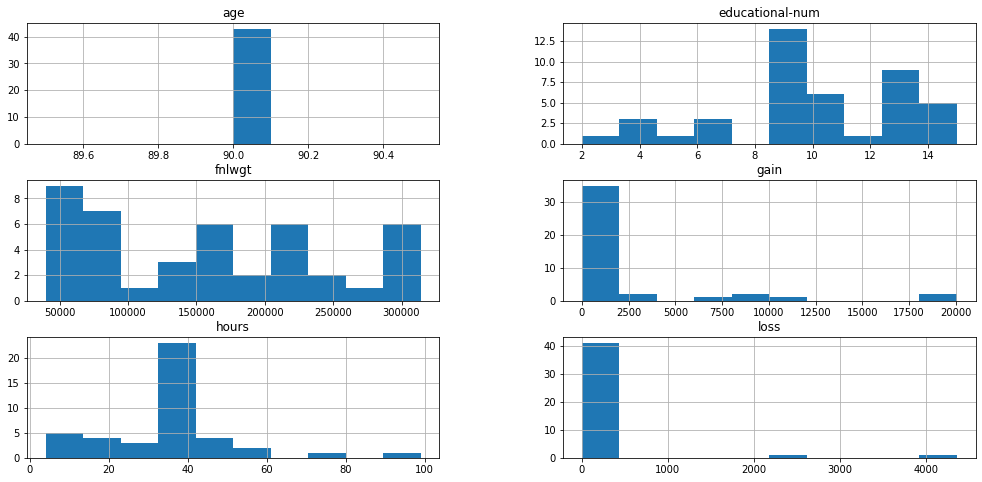

In [26]:
census[census['age'] == 90].hist(figsize = (17,8));

In [27]:
cols = ['workclass','occupation', 'income']
for col in cat_col.index:
    if col in cols:
        print(census[census['age'] == 90][col].value_counts())
    else:
        continue

Private           28
unknown            7
Govt_employees     5
Self_employed      3
Name: workclass, dtype: int64
Exec-managerial      8
unknown              7
Other-service        6
Prof-specialty       5
Adm-clerical         4
Sales                3
Craft-repair         3
Machine-op-inspct    3
Farming-fishing      1
Transport-moving     1
Protective-serv      1
Handlers-cleaners    1
Name: occupation, dtype: int64
<=50K    35
>50K      8
Name: income, dtype: int64


At age 90 people can't work in goverment or private sectors.

In [28]:
# drop rows with age 90
print("Number of observation before droping:",census.shape)
index_age = census[census['age'] == 90].index
census.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after droping:",census.shape)

Number of observation before droping: (32561, 15)
Number of observation after droping: (32518, 15)


In [29]:
del_col = ['relationship','educational-num']
census.drop(labels = del_col,axis = 1,inplace = True)
census.shape

(32518, 13)

In [30]:
cat=['workclass', 'education', 'marital-status', 'occupation',
               'race', 'gender', 'native-country', 'income']
for val in cat:
    le=LabelEncoder()
    census[val]=le.fit_transform(census[val].astype("str"))
census.dtypes

age               int64
workclass         int32
fnlwgt            int64
education         int32
marital-status    int32
occupation        int32
race              int32
gender            int32
gain              int64
loss              int64
hours             int64
native-country    int32
income            int32
dtype: object

In [31]:
X=census.drop(['income'], axis = 1)
print(X.shape)

(32518, 12)


In [32]:
y =census['income'] 
print(y.shape)

(32518,)


In [33]:
census.skew()

age                0.516842
workclass          0.414930
fnlwgt             1.447845
education          0.012985
marital-status     0.794283
occupation         0.126591
race              -2.436949
gender            -0.719260
gain              11.955560
loss               4.581189
hours              0.226736
native-country    -4.206420
income             1.211967
dtype: float64

In [34]:
from scipy.stats import zscore

z_score=abs(zscore(census))
print(census.shape)
census=census.loc[(z_score<3).all(axis=1)]
print(census.shape)

(32518, 13)
(27932, 13)


In [35]:
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
census= scaler.fit_transform(census)

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state= 52)

In [37]:
X_train.shape

(21787, 12)

In [38]:
X_test.shape

(10731, 12)

In [39]:
print(y_train.shape)
print(y_test.shape)

(21787,)
(10731,)


In [40]:
lr= LogisticRegression()
tree = DecisionTreeClassifier()
knn =  KNeighborsClassifier()
svc = SVC()
forest = RandomForestClassifier()
ada = AdaBoostClassifier()
gnb = GaussianNB()

In [41]:
models = {lr:'LogisticRegression',
          tree:'DecisionTree',
          knn: 'KNN',
          svc: 'SVC',
          forest: 'RandomForest',
          ada: 'Adaboost',
          gnb: 'Naive'}

In [42]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Naive']

In [43]:
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

def acc_res(y_test,y_pred):
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)

    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
        
    return accuracy_scores
    
accuracy_scores = main(models)

--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 79.5266%
Confusion Matrix
[[7730  422]
 [1775  804]]
Classification Report
              precision    recall  f1-score   support

           0       0.81      0.95      0.88      8152
           1       0.66      0.31      0.42      2579

    accuracy                           0.80     10731
   macro avg       0.73      0.63      0.65     10731
weighted avg       0.78      0.80      0.77     10731

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTree: 80.8592%
Confusion Matrix
[[7086 1066]
 [ 988 1591]]
Classification Report
              precision    recall  f1-score   support

           0       0.88      0.87      0.87      8152
           1       0.60      0.62      0.61      2579

    accuracy                           0.81     10731
   macro av

In [44]:
abc = AdaBoostClassifier(n_estimators=52,learning_rate=1)

model = abc.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.857795172863666


In [45]:
from sklearn.model_selection import cross_val_score
cross_validation = cross_val_score(estimator = model, X = X_train,y = y_train, cv = 10)
print("Cross validation accuracy of AdaBoostClassifier  = ", cross_validation)
print("\nCross validation mean accuracy of AdaBoostClassifier = ", cross_validation.mean())

Cross validation accuracy of AdaBoostClassifier  =  [0.85963303 0.85137615 0.86238532 0.85727398 0.84343434 0.85720845
 0.85812672 0.86271809 0.86088154 0.86042241]

Cross validation mean accuracy of AdaBoostClassifier =  0.8573460026184703


I will choose Adaboost as my final model because it perform well in this dataset.

Accuracy_score=85.77

Cross_val_score= 85.73

In [46]:
from sklearn.externals import joblib

joblib.dump(model,'census_joblib')

['census_joblib']